# MICE PROTEIN EXPRESSION

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('C:/Users/ATHUL/Desktop/Data_Cortex_Nuclear.csv')

## DATA VISUALIZATION

In [3]:
df.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [4]:
#removing the null values
mice_df = df.dropna(how='any', thresh=75)

mice_df = df.fillna(mice_df.mean());

C:\Users\ATHUL\AppData\Local\Temp/ipykernel_11072/783676812.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mice_df = df.fillna(mice_df.mean());


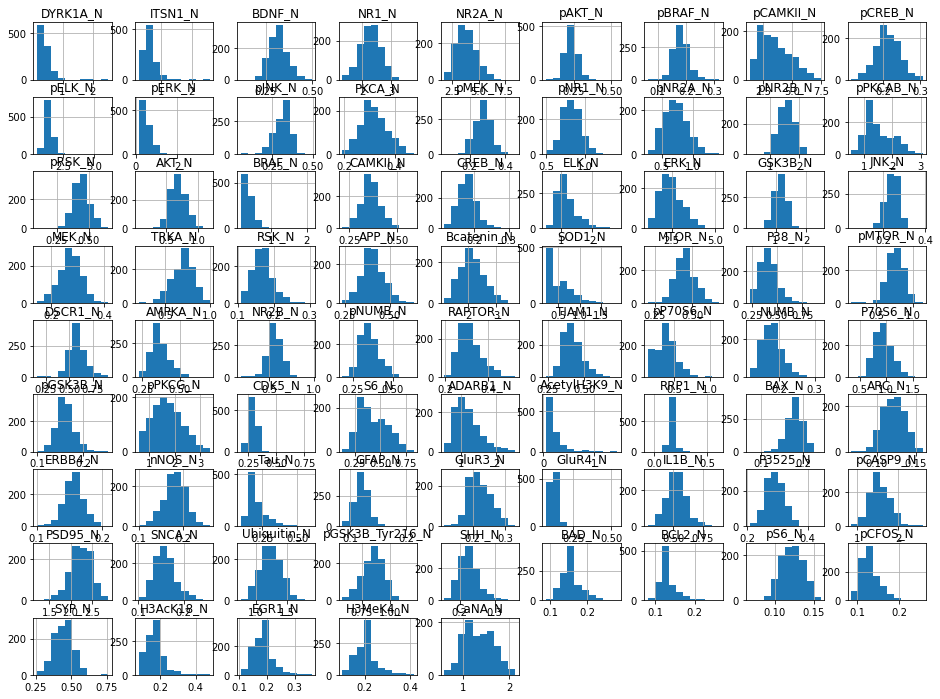

In [5]:
plt.rcParams["figure.figsize"] = [16, 12]
mice_df.hist();

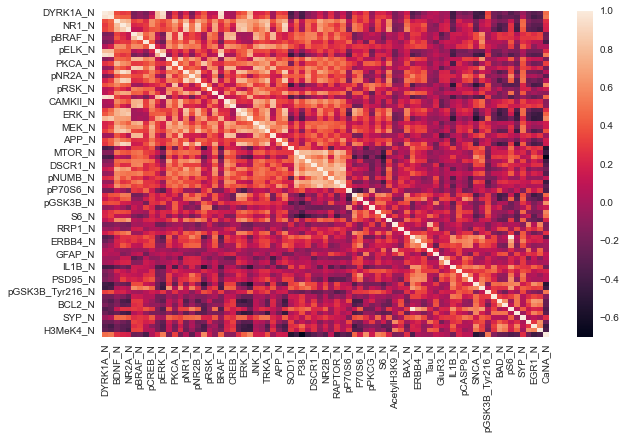

In [95]:
#correlation heatmap
plt.figure(figsize=(10,6));
sns.heatmap(mice_df.corr());

number of classes:  8
class names:  ['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


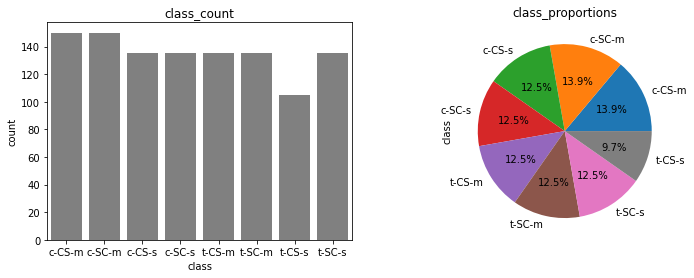

In [7]:
#information on classes
print('number of classes: ',mice_df['class'].nunique())
print('class names: ', mice_df['class'].unique())

plt.figure(figsize=(12,4));
plt.subplot(1,2,1);
plt.title('class_count');
sns.countplot(x='class', data=df, color='Grey');
plt.subplot(1,2,2);
plt.title('class_proportions');
df['class'].value_counts().plot(kind='pie',autopct='%1.1f%%');

In [8]:
df1=mice_df

In [9]:
df1['MouseNumber'] = df1.MouseID.apply(lambda x: x.split('_')[0])
df1['MouseVersion'] = df1.MouseID.apply(lambda x: x.split('_')[1])
df1.drop(['MouseID'], axis=1, inplace=True)

In [10]:
mean_mouse_values = df1.groupby(by=['class']).mean().reset_index()

In [11]:
class_value = 'class'

def fix_null_values(row, col):
    value = row[col]
    if pd.isnull(value):
        return mean_mouse_values.loc[mean_mouse_values[class_value] == row[class_value], col], True
    return value, False
for i, row in df1.iterrows():
    for col in df1.columns:
        row[col], fixed = fix_null_values(row, col)
    df1.iloc[i] = row

In [12]:
class_labels = ['Genotype','Treatment','Behavior','class', 'MouseNumber', 'MouseVersion']
melt_df = pd.melt(df1, id_vars = class_labels)

In [13]:
expression_level_means = melt_df.groupby(by=['variable']).max().reset_index()
variable_list = expression_level_means.sort_values(by='value').variable
variable_subsets = np.array(variable_list).reshape(11,7)

In [14]:
class PlotManager(object):
    def __init__(self):
        self.i = 1
    def save_last_plt(self):
        plt.savefig('Figure_{}.png'.format(self.i))
        self.i += 1

plt_manager = PlotManager()

def plot_expression_values():
    for (i, variable_subset) in enumerate(variable_subsets):
        data = melt_df.loc[melt_df.variable.isin(variable_subset)]

        sns.violinplot(x="variable", y="value", hue="variable", width=1, data=data, scale="area", orient="v")     

        sns.despine(left=True)
        plt_manager.save_last_plt()
        yield plt.show()

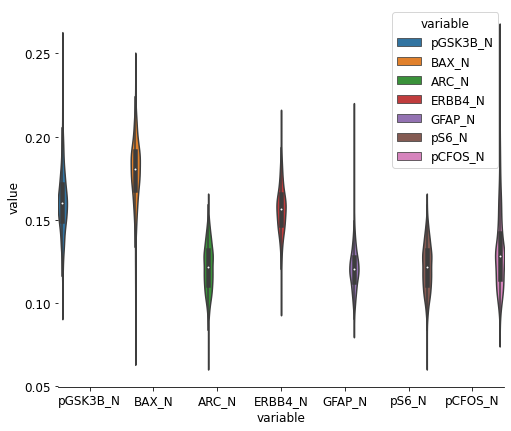

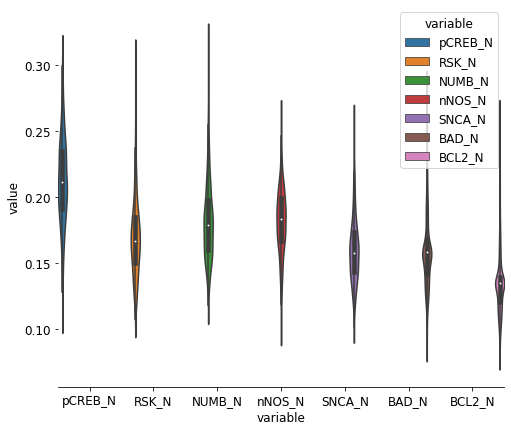

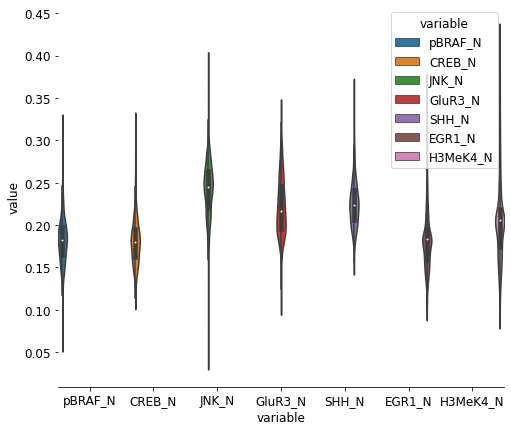

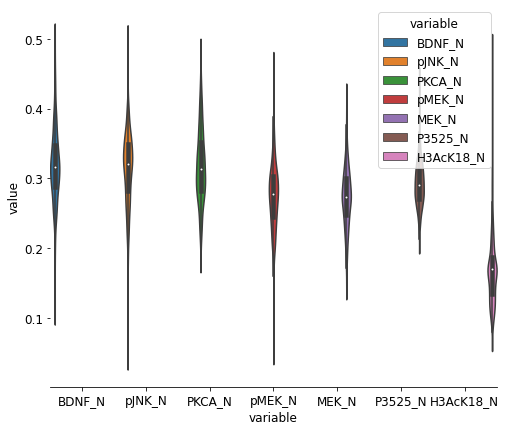

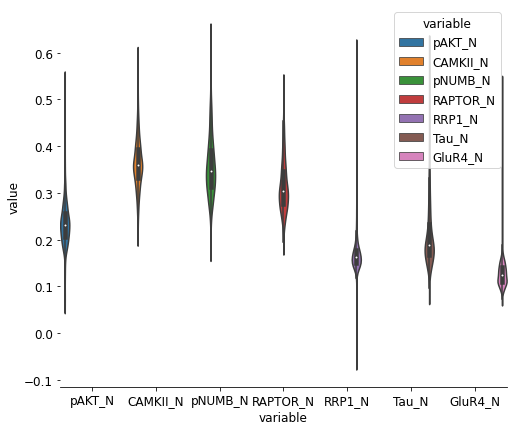

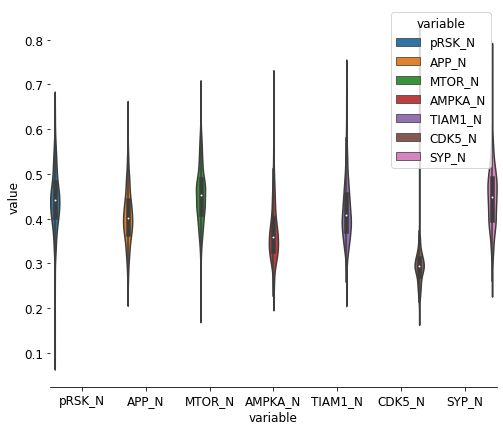

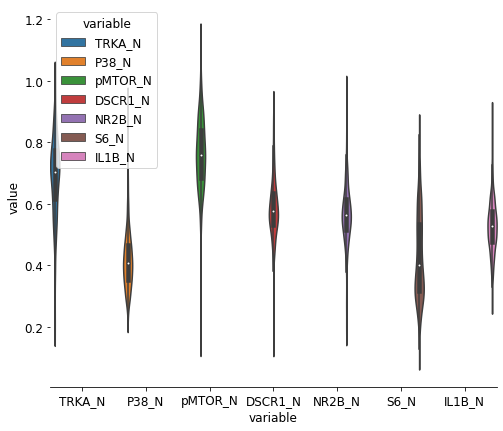

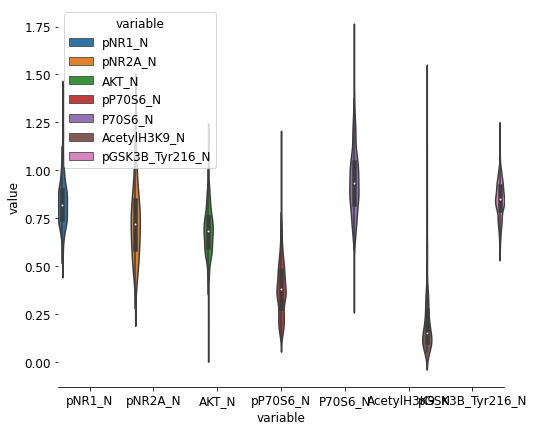

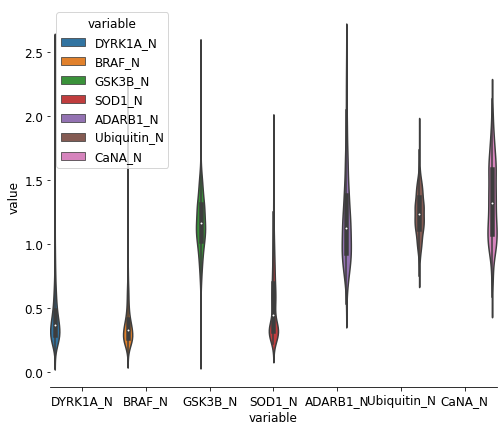

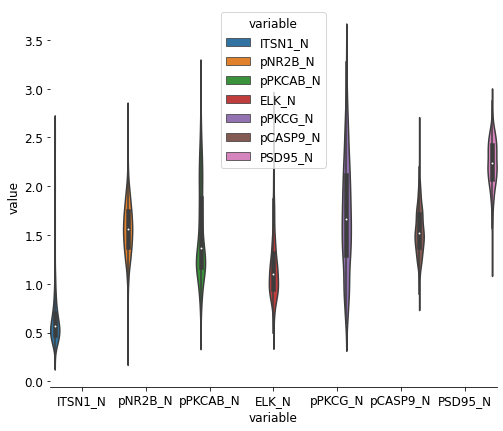

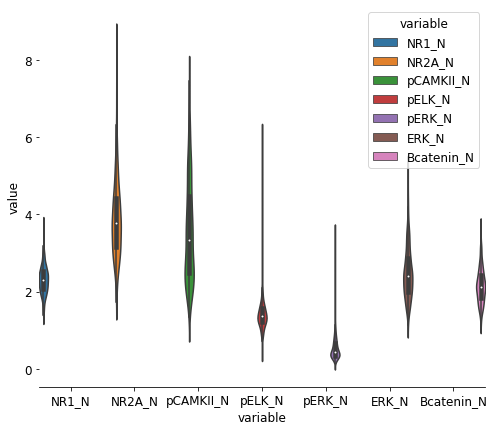

In [40]:
#creating violin plots for all protein classes
expression_plots = plot_expression_values()
for i in range(11):
    plt.figure(figsize = (8,7))
    next(expression_plots)

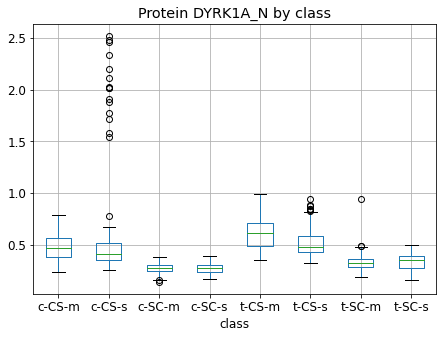

<Figure size 504x360 with 0 Axes>

In [33]:
#MBox plot of DYRK1A_N since it has big range of outliers.
plt.rcParams["figure.figsize"] = [7, 5]
df1.boxplot(column='DYRK1A_N', by ='class')

plt.title('Protein DYRK1A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")

plt.show()
plt_manager.save_last_plt()

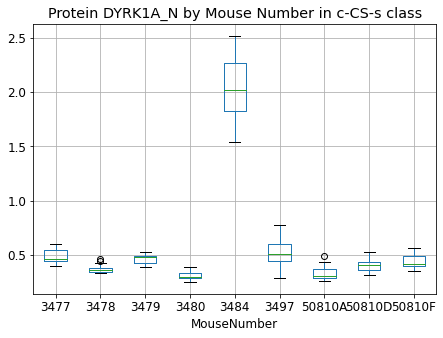

<Figure size 504x360 with 0 Axes>

In [34]:
#Box plot of c-CS-s class.
plt.rcParams["figure.figsize"] = [7, 5]
raw=df1.loc[df1['class'] == 'c-CS-s']
raw.boxplot(column='DYRK1A_N', by ='MouseNumber')
plt.title('Protein DYRK1A_N by Mouse Number in c-CS-s class')
plt.rcParams.update({'font.size': 10})
plt.suptitle("")
plt.show()
plt_manager.save_last_plt()

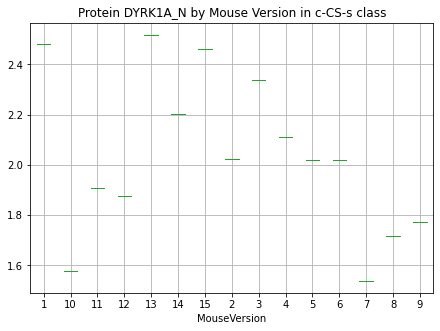

In [35]:
raw1=raw.loc[raw['MouseNumber'] == '3484']
raw1.boxplot(column='DYRK1A_N', by ='MouseVersion')
plt.rcParams["figure.figsize"] = [7, 5]
plt.title('Protein DYRK1A_N by Mouse Version in c-CS-s class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

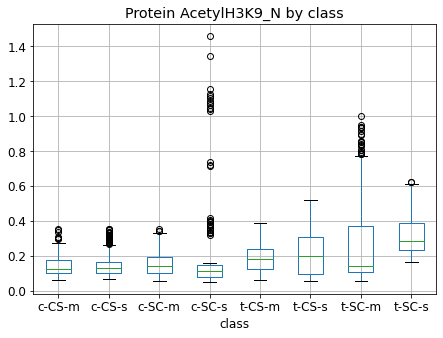

In [41]:
#second
df1.boxplot(column='AcetylH3K9_N', by ='class')
plt.title('Protein AcetylH3K9_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

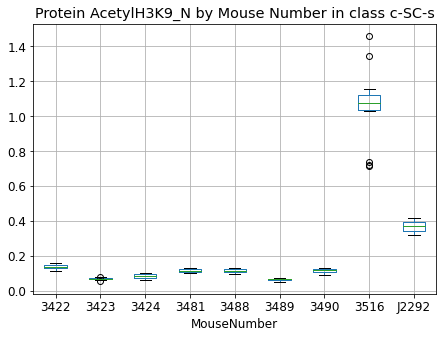

In [42]:
df3=df1.loc[df1['class'] == 'c-SC-s']
df3.boxplot(column='AcetylH3K9_N', by ='MouseNumber')
plt.title('Protein AcetylH3K9_N by Mouse Number in class c-SC-s')
plt.rcParams.update({'font.size': 8})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

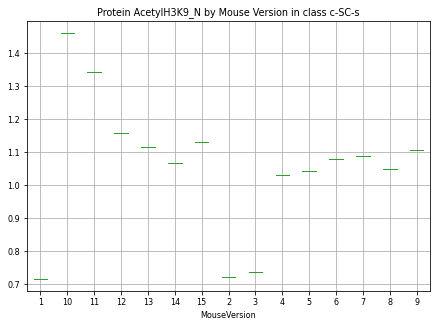

In [44]:
df4=df3.loc[df3['MouseNumber'] == '3516']
#raw3a.plot(x='MouseVersion', y='AcetylH3K9_N')

df4.boxplot(column='AcetylH3K9_N', by ='MouseVersion')
plt.title('Protein AcetylH3K9_N by Mouse Version in class c-SC-s')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt_manager.save_last_plt()

plt.show()

## CLASSIFICATION 

In [19]:
#using labelencoder to encode the strings the unique strings in the columns 
df = df.dropna()
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['class'] = enc.fit_transform(df['class'])

In [20]:
x_data = df.iloc[:,1:78]
# Getting x_data and printing instances of x_data

x_data = x_data.values
x_data[0:2]

array([[0.64978128, 0.82869641, 0.40586177, 2.92143482, 5.167979  ,
        0.2071741 , 0.17664042, 3.72808399, 0.23928259, 1.66657918,
        0.96946632, 0.32125984, 0.40656168, 0.25529309, 1.05634296,
        1.09930009, 1.92528434, 2.23167104, 0.42685914, 0.87322835,
        0.5127734 , 0.3432196 , 0.16762905, 1.85275591, 3.36649169,
        1.50367454, 0.24601925, 0.30542432, 0.85100612, 0.16517935,
        0.44155731, 2.57821522, 0.34085739, 0.48766404, 0.40104987,
        0.78136483, 0.53403325, 0.43184602, 0.61802275, 0.36141732,
        0.32195976, 0.42729659, 0.25205599, 0.24208604, 1.06118101,
        0.16375812, 1.8623681 , 0.32117492, 0.54104099, 2.15954748,
        0.1346388 , 0.15817776, 0.19612419, 0.13200081, 0.16112013,
        0.21098823, 0.21037946, 0.12814529, 0.29246144, 0.1525974 ,
        0.52724229, 0.34806209, 1.68755073, 2.43658685, 0.16817167,
        1.13915382, 0.98777395, 0.23975244, 0.13905235, 0.11292614,
        0.13200081, 0.12936282, 0.48691153, 0.12

In [21]:
#y_data

y_data = df['class'].values
#Getting the unique classes in y_data and the no of instances of each 


unique , counts = np.unique(y_data,return_counts=True)
print(unique,counts)


[0 1 2 3 4 5 6 7] [45 75 60 75 90 75 60 72]


In [22]:
#scaling the inputs using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)
x_data[0:2]

array([[ 1.43670714,  1.12612827,  1.70538327,  1.70323178,  1.49995771,
        -0.45054164,  0.04754992,  0.07722825,  0.86257169,  0.76181626,
         1.86520493,  0.27687724,  1.55670026, -0.22285567,  1.85707195,
         1.87867141,  1.30736555,  1.18843304, -0.36085459,  1.48850415,
         1.18722443, -0.10408608, -0.21598971,  1.7790818 ,  1.33175035,
         1.55572493,  0.33806607,  0.82236687,  1.26626099,  0.18290735,
         0.53605   ,  0.94474418, -0.6642671 ,  0.70808321, -0.06404139,
         0.28060011, -0.27315372,  1.23842171,  0.75159634,  0.24542234,
         0.42693232,  0.24194543, -0.93608574,  1.7651144 ,  0.54189096,
         0.14725209,  0.08686206,  0.61658668,  0.66688471,  2.52795364,
        -0.45302747, -0.1278299 ,  0.8334766 ,  0.83764337,  0.35303447,
         1.01215806,  0.09289556,  0.92587142,  2.07832657,  1.31284564,
         0.00324428,  1.90741363,  0.43557705,  0.87579814,  0.52423411,
        -0.47365992,  1.46125019,  0.41572273, -0.5

In [23]:
# splitting data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3)

In [24]:
#Getting our classifier

from sklearn.svm import SVC
classifier = SVC(gamma='scale')
classifier.fit(x_train,y_train)

SVC()

In [25]:
#using cross_val_score for checking accuracy on different folds

from sklearn.model_selection import cross_val_score
results = cross_val_score(classifier,x_data,y_data,cv=5)
print(results)

[0.54054054 0.85585586 0.78181818 0.91818182 0.78181818]


In [26]:

# accuracy on training set

classifier.score(x_train,y_train)

1.0

In [27]:
classifier.score(x_test,y_test)

0.9939759036144579

## RANDOM FOREST  CLASSIFICATION

In [49]:
# Use a feature selection to find the important proteins for predicting the treatment, behavior and class

# Assgning the data and target
X = mice_df.loc[:, 'DYRK1A_N':'CaNA_N']
y = mice_df['class']
# Splitting the train and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [50]:
#Creating a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)

# Train the classifier
clf.fit(X_train, y_train)

# assigning the all importance values to a series
importance = pd.Series(clf.feature_importances_)

# Print the name and gini importance of each feature
for feature in zip(mice_df.loc[: ,'DYRK1A_N':'CaNA_N'], clf.feature_importances_):
    print(feature)

('DYRK1A_N', 0.025499512095032085)
('ITSN1_N', 0.02526158440996061)
('BDNF_N', 0.005987874736301001)
('NR1_N', 0.006712127116581916)
('NR2A_N', 0.006161275716590869)
('pAKT_N', 0.008396921162954868)
('pBRAF_N', 0.0075481242950554295)
('pCAMKII_N', 0.02761191240327802)
('pCREB_N', 0.009128553570708903)
('pELK_N', 0.006136443971538171)
('pERK_N', 0.025673232152982495)
('pJNK_N', 0.007556040240562895)
('PKCA_N', 0.01175920317051453)
('pMEK_N', 0.008536817002829314)
('pNR1_N', 0.0089917145016689)
('pNR2A_N', 0.009902958441392459)
('pNR2B_N', 0.005022697546965785)
('pPKCAB_N', 0.025005977927041748)
('pRSK_N', 0.009569754206559639)
('AKT_N', 0.018948396955308193)
('BRAF_N', 0.02228851760207966)
('CAMKII_N', 0.010680374174326332)
('CREB_N', 0.005253514838564938)
('ELK_N', 0.00568663272555999)
('ERK_N', 0.006152835253215587)
('GSK3B_N', 0.0093238829989154)
('JNK_N', 0.0065209389091905245)
('MEK_N', 0.004786556531876087)
('TRKA_N', 0.006412698182580618)
('RSK_N', 0.0050336077401643455)
('APP_N'

In [51]:
# Test the classifer to get the accuracy
y_pred = clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9837962962962963

In [53]:
#Let's use a threshold to find the most important proteins

# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.014
# accuracy of limited feature model gets lower if I do lower than 0.014 or higher
sfm = SelectFromModel(clf, threshold=0.014)

# Train the selector
sfm.fit(X_train, y_train)

# making arrays to keep track of the important proteins' importance values and index
imp = []
imp_index = []

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    imp.append(list(mice_df.loc[:, 'DYRK1A_N':'CaNA_N'])[feature_list_index])
    print(list(mice_df.loc[:, 'DYRK1A_N':'CaNA_N'])[feature_list_index])
    imp_index.append(feature_list_index)

# Making the list of important proteins so I can make a dataframe with it
s_imp = pd.Series(imp)

# Getting the importance values of only the important proteins
protein_importance = (importance)[imp_index]

# Making a dataframe of the proteins with  importance values
p = {'Important Proteins': imp, 'Importance Value': protein_importance}
df_importance = pd.DataFrame(p)

DYRK1A_N
ITSN1_N
pCAMKII_N
pERK_N
pPKCAB_N
AKT_N
BRAF_N
APP_N
SOD1_N
P38_N
pNUMB_N
pP70S6_N
pGSK3B_N
pPKCG_N
S6_N
AcetylH3K9_N
ARC_N
Tau_N
Ubiquitin_N
pS6_N
CaNA_N


In [54]:
# sorting the proteins by importance and printing it
df_importance.sort_values('Importance Value', ascending=False, inplace=True)
print(df_importance)


   Important Proteins  Importance Value
32             SOD1_N          0.058882
46            pPKCG_N          0.039323
76             CaNA_N          0.036684
30              APP_N          0.033064
65        Ubiquitin_N          0.032740
7           pCAMKII_N          0.027612
53              ARC_N          0.026766
10             pERK_N          0.025673
0            DYRK1A_N          0.025500
1             ITSN1_N          0.025262
17           pPKCAB_N          0.025006
56              Tau_N          0.022867
20             BRAF_N          0.022289
34              P38_N          0.021871
42           pP70S6_N          0.020636
45           pGSK3B_N          0.019774
70              pS6_N          0.019454
19              AKT_N          0.018948
39            pNUMB_N          0.018189
50       AcetylH3K9_N          0.017311
48               S6_N          0.017119


In [55]:
# ceating a new data set from the sfm model to test the accuracy of a limited feature model
X_imp_train = sfm.transform(X_train)
X_imp_test = sfm.transform(X_test)

In [56]:
# creating a new random forest model classifier for the most important features
clf_imp = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)

# training the random forest classfier on the new limited feature data sets
clf_imp.fit(X_imp_train, y_train)

RandomForestClassifier(n_jobs=1, random_state=1)

In [57]:
# Test the classifer to get the accuracy
y_imp_pred = clf_imp.predict(X_imp_test)

# Getting the accuracy score of the limited classifier model
accuracy_score(y_test, y_imp_pred)

# There is almost no difference between the accuracies of the 2 models 

0.9907407407407407

In [62]:
# creating a data frame of the values of only the important proteins for plotting
protein_ex = mice_df.loc[:, imp]


# creating a dataframe with only the the types of mice
description = mice_df.loc[:, ['Genotype', 'Treatment','Behavior', 'class']]


# joining the two dataframes together
protein_exd = protein_ex.join(description)


In [63]:
# Creating the test and train data for the genotype
protein_exd['Genotype'] = protein_exd['Genotype'].map({'Control': 0, 'Ts65Dn': 1})

yg = protein_exd['Genotype']

# Splitting the train and testing data
yg_train, yg_test = train_test_split(yg, test_size=0.4, random_state=1)

# making a new random forest classifer model that uses only the top 3 important proteins for the visualization
clf_impt = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)

# training the random forest classfier on the new limited feature data sets
clf_impt.fit(X_imp_train, yg_train)

RandomForestClassifier(n_jobs=1, random_state=1)

## K-Nearest Neighbours

In [58]:
# importing packages
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# creating an instance of the kNN model
# n_jobs=-1 makes it so that computations run in parallel
kmodel = KNeighborsClassifier(n_jobs=-1)

# setting the parameters I want to test
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

# creating a grid search with the parameters 
grid = GridSearchCV(kmodel, param_grid=params, n_jobs=1, scoring='accuracy')

# fitting the model
grid.fit(X_imp_train, y_train)


print("Best Hyper Parameters:\n",grid.best_params_)

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}


In [59]:
#getting the accuracy of the kNN model
pred = grid.predict(X_imp_test)

print('Accuracy:', accuracy_score(pred, y_test))

Accuracy: 0.9837962962962963


In [64]:
#Making a new model to predict genotypes to make an ROC curve
kgmodel = KNeighborsClassifier(n_jobs=-1)
kgmodel.fit(X_imp_train, yg_train)

#Getting the accuracy
pred_gen = kgmodel.predict(X_imp_test)

print('Accuracy:', accuracy_score(pred_gen, yg_test))

Accuracy: 0.9421296296296297


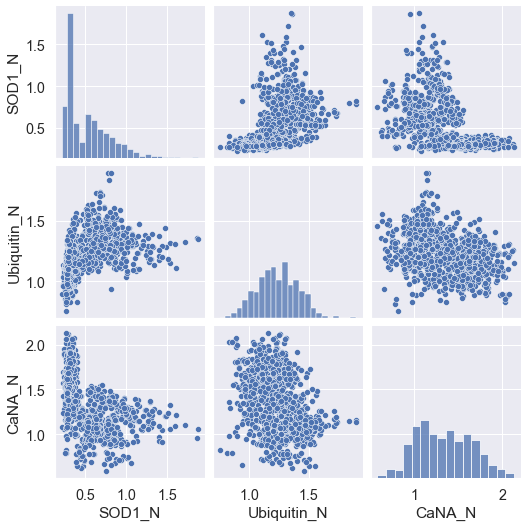

In [65]:
#do subplots with correlations between top 3 proteins and mice descriptions
from pylab import rcParams

sns.set(font_scale=1.3)
rcParams['figure.figsize'] = (20, 20)
cols = ['SOD1_N', 'Ubiquitin_N', 'CaNA_N']
x = protein_exd[['SOD1_N', 'Ubiquitin_N', 'CaNA_N']]
sns_plot = sns.pairplot(x[cols])

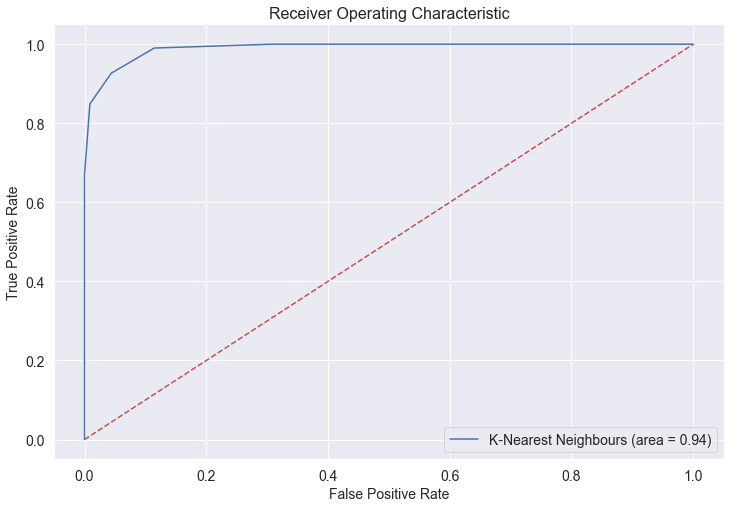

In [83]:
# Making a visual for the ROC curve for the KNN model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(yg_test, kgmodel.predict(X_imp_test))
fpr, tpr, thresholds = roc_curve(yg_test, kgmodel.predict_proba(X_imp_test)[:,1:26])
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='K-Nearest Neighbours (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.style.use('seaborn')
plt.show()

## Diagnostic of the models

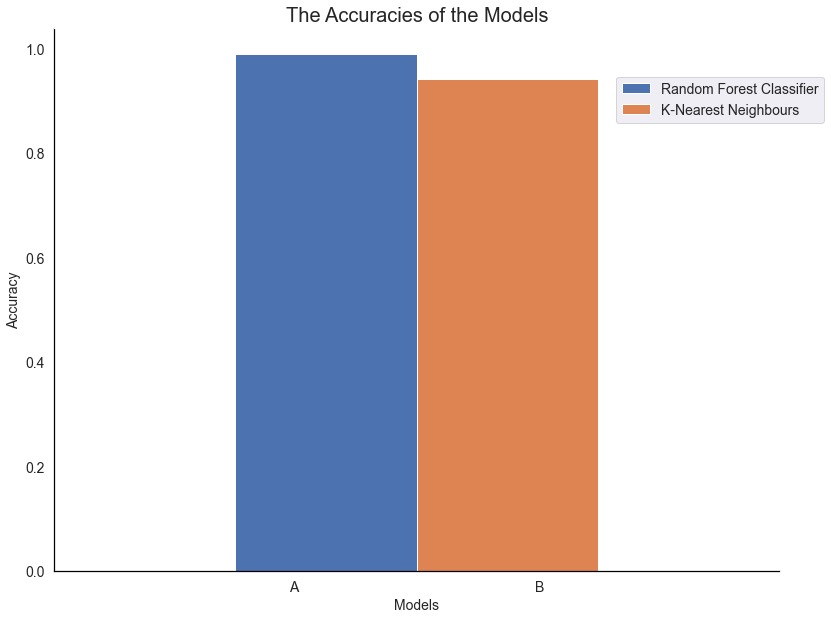

In [82]:
#Making a bar plot comparing all the accuracies of the models that predict genotype

# Making a dataframe of the accuracies
a = {'Random Forest Classifier': [0.9907407407407407], 'K-Nearest Neighbours': [0.9421296296296297]}
accuracies = pd.DataFrame(data=a)
#accuracies.rename(index={0:'Random Forest Classifier',1:'K-Nearest Neighbours', 2:'Logistic Regression'}, 
#                 inplace=True)

# making bar plot comparing the accuracies of the models
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['A', 'B']
xticks = [-0.17, 0.17]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title('The Accuracies of the Models', fontsize=20);
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')


